In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score, mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [ ]:

data= pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/medical_cost_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df=pd.DataFrame(data)
df  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 
lecode=LabelEncoder()


In [ ]:
df["sex"]=lecode.fit_transform(df["sex"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [ ]:
df["smoker"]=lecode.fit_transform(df["smoker"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df["region"]=lecode.fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


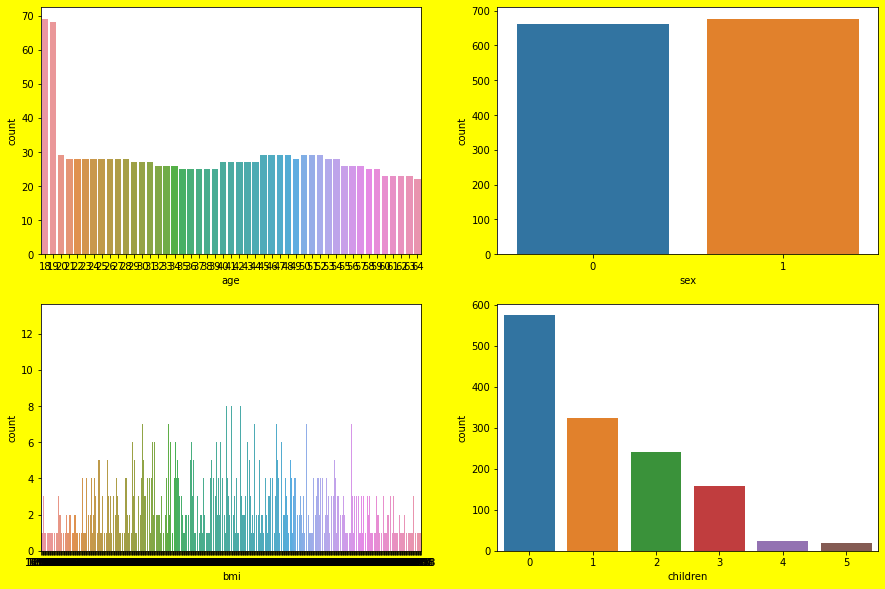

In [53]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

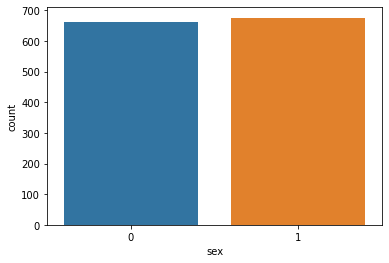

In [ ]:
sns.countplot("sex",data=df)

In [ ]:
df["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

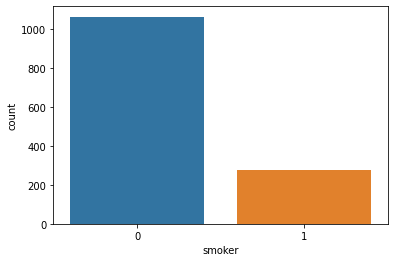

In [ ]:
sns.countplot("smoker",data=df)

In [ ]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

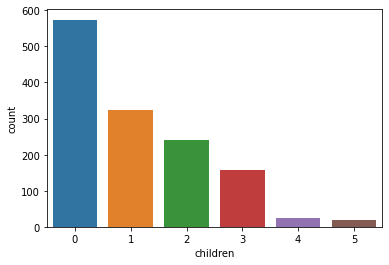

In [ ]:
sns.countplot("children",data=df)

In [ ]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
plt.figure(figsize=(10,10),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
x=df.iloc[:,0:-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y=df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [57]:
x.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


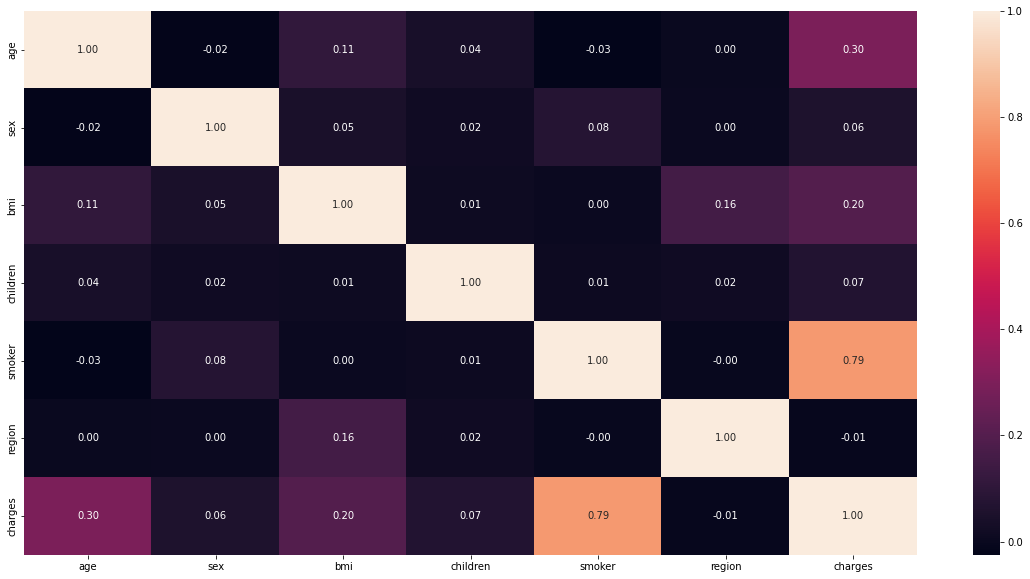

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

,Vif,features
0,3.185049,age
1,1.824474,sex
2,3.115519,bmi
3,2.564581,children
4,1.235951,smoker
5,1.814569,region


In [63]:
# detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(x))

In [64]:
threshold=3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317]), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2]))


In [65]:
df1=z[(z<3).all(axis=1)]
df1.shape

(1316, 6)

In [66]:
loss= (1338-1316)/1338*100
print(loss)

1.6442451420029895


In [67]:
y=y[(z<3).all(axis=1)]
y.shape

(1316,)

In [68]:
df1.shape

(1316, 6)

In [69]:
df1.skew()

age        -0.050064
sex         0.012172
bmi         0.816774
children    0.435972
smoker      1.450367
region      0.060802
dtype: float64

In [ ]:
#from sklearn.preprocessing import power_transform
# dfx=power_transform(df1["bmi"],method="yeo-johnson")
# dfx

In [70]:
from sklearn.preprocessing import PowerTransformer

In [71]:
# transform=power_transform(method="yeo-johnson")
transform = PowerTransformer(method="yeo-johnson")

In [72]:
df1['bmi'] = transform.fit_transform(df1[['bmi']].values)
df1['bmi']

0      -0.483047
1      -0.353543
2      -0.653911
3       0.976866
4      -0.893681
          ...   
1333   -1.664033
1334   -1.144228
1335    0.575024
1336    0.219743
1337   -0.981358
Name: bmi, Length: 1316, dtype: float64

In [73]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(df1) 
x=x_scaled
x

array([[0.81347276, 1.        , 0.32437868, 0.35585106, 1.        ,
        0.96956522],
       [0.8541464 , 0.        , 0.35531862, 0.        , 0.        ,
        0.        ],
       [0.44741002, 0.        , 0.28355721, 0.64414894, 0.        ,
        0.        ],
       ...,
       [0.8541464 , 1.        , 0.57716372, 0.35585106, 0.        ,
        0.        ],
       [0.73212549, 1.        , 0.49228309, 0.35585106, 0.        ,
        0.96956522],
       [0.87797909, 1.        , 0.20532651, 0.35585106, 1.        ,
        0.03043478]])

In [91]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
#Vif["features"]=x.column
Vif

,Vif
0,3.179979
1,1.823485
2,3.091815
3,2.563017
4,1.235693
5,1.813743


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=29)
x_train


array([[0.69145185, 1.        , 0.03599152, 0.35585106, 0.        ,
        1.        ],
       [0.32538911, 1.        , 0.64641595, 0.        , 1.        ,
        1.        ],
       [0.34922179, 1.        , 0.56057462, 0.35585106, 0.        ,
        0.03043478],
       ...,
       [0.65077821, 0.        , 0.59181362, 0.64414894, 0.        ,
        0.96956522],
       [0.77279912, 0.        , 0.4770474 , 0.        , 0.        ,
        0.        ],
       [0.65077821, 1.        , 0.56636313, 0.28829787, 1.        ,
        1.        ]])

In [82]:
y_train

1276     2741.94800
577     58571.07448
1193     8671.19125
1269     8615.30000
1061    11554.22360
           ...     
365      9778.34720
874      8891.13950
817      3597.59600
516     27724.28875
240     38511.62830
Name: charges, Length: 987, dtype: float64

In [83]:
lr=LinearRegression()

In [84]:
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
lr.score(x_train,y_train)

0.6364386762844593

In [86]:
y_pred=lr.predict(x_test)
y_pred

array([ 7371.98257342,  8588.44642254,  8596.46887974,  7272.89031542,
        9677.26948548,  6980.40931173,  8823.59309166, 32636.23493389,
        9754.64904941, 31919.20455062, 33017.72312752, 32262.30802755,
        8187.89268251,  7204.25114364,  7303.6888303 ,  7007.98405574,
       32747.43733586,  7541.18711807,  8340.3433977 ,  8110.22653199,
        7276.0327569 ,  7345.01804236,  8078.105904  ,  7336.37986181,
        9548.74126074,  9302.34390105,  8667.6517812 ,  9160.55144963,
       33040.90469447, 33306.49834322, 31381.91887197,  9105.20234333,
        8166.45131659,  7439.23180575,  7801.77092771,  8326.80960877,
        9102.4566394 ,  9118.94906118,  7747.48526968,  8553.84934432,
       31734.96592637,  7442.07728666,  8376.37120335,  8371.95012603,
        7012.32097733, 31618.53249423,  9265.18661103,  6750.16641684,
        7216.61129949,  7545.15683936,  7170.78967707,  8047.77456528,
        7836.08841496,  7533.4872346 ,  7732.01394383,  7719.2184074 ,
      

In [87]:
cross_val= cross_val_score(lr,x,y,cv=5)
print(cross_val)
print(cross_val.mean)
print(cross_val.std())

[0.62358813 0.59159628 0.62528276 0.59306429 0.65256009]
<built-in method mean of numpy.ndarray object at 0x7f68e56dcdb0>
0.0227796221756545


In [88]:
print("MAE",mean_squared_error(y_test,y_pred))

MAE 59650038.08324166


In [89]:
print(r2_score(y_test,y_pred))

0.5783825350175791


In [90]:
df=pd.DataFrame(y_pred)
df.to_csv("medical_cost_insurance.csv")